# A/B Hypothesis Testing

# Objective
# Statistically validate or reject key hypotheses about risk drivers.

In [10]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Data (pipe-separated, skip malformed rows)

In [11]:
df = pd.read_csv(
    '../data/insurance_claims.csv',
    sep='|',
    engine='python',
    on_bad_lines='skip'
)

# Quick Clean

In [12]:
df['TotalClaims'] = pd.to_numeric(df['TotalClaims'], errors='coerce').fillna(0)
df['TotalPremium'] = pd.to_numeric(df['TotalPremium'], errors='coerce').fillna(0)
df['Margin'] = df['TotalPremium'] - df['TotalClaims']
df['Gender'] = df['Gender'].astype(str)
df['Province'] = df['Province'].astype(str)
df['PostalCode'] = df['PostalCode'].astype(str)

# Test 1: Risk Differences Across Provinces

In [13]:
groups = [group['TotalClaims'].values for name, group in df.groupby('Province') if len(group) > 0]

f_stat, p_value = stats.f_oneway(*groups)

print(f"ANOVA Results for Provinces:")
print(f"F-Statistic: {f_stat:.4f}")
print(f"P-Value: {p_value:.4e}")

if p_value < 0.05:
    print("Conclusion: REJECT Null Hypothesis. Significant differences across provinces.")
else:
    print("Conclusion: FAIL TO REJECT Null Hypothesis.")

ANOVA Results for Provinces:
F-Statistic: 5.8494
P-Value: 1.6782e-07
Conclusion: REJECT Null Hypothesis. Significant differences across provinces.


# Test 2: Risk Differences Between Top 20 Zip Codes

In [14]:
top_zips = df['PostalCode'].value_counts().head(20).index
df_zip = df[df['PostalCode'].isin(top_zips)]

groups_zip = [group['TotalClaims'].values for name, group in df_zip.groupby('PostalCode') if len(group) > 0]

f_stat_zip, p_value_zip = stats.f_oneway(*groups_zip)

print(f"\nANOVA Results for Top 20 Zip Codes (Risk/Claims):")
print(f"F-Statistic: {f_stat_zip:.4f}")
print(f"P-Value: {p_value_zip:.4e}")

if p_value_zip < 0.05:
    print("Conclusion: REJECT Null Hypothesis. Risk differs by Zip Code.")
else:
    print("Conclusion: FAIL TO REJECT Null Hypothesis.")


ANOVA Results for Top 20 Zip Codes (Risk/Claims):
F-Statistic: 3.1241
P-Value: 4.8926e-06
Conclusion: REJECT Null Hypothesis. Risk differs by Zip Code.


# Test 3: Margin Differences Between Zip Codes

In [15]:
groups_margin = [group['Margin'].values for name, group in df_zip.groupby('PostalCode') if len(group) > 0]

f_stat_margin, p_value_margin = stats.f_oneway(*groups_margin)

print(f"\nANOVA Results for Top 20 Zip Codes (Margin):")
print(f"F-Statistic: {f_stat_margin:.4f}")
print(f"P-Value: {p_value_margin:.4e}")

if p_value_margin < 0.05:
    print("Conclusion: REJECT Null Hypothesis. Margin differs by Zip Code.")
else:
    print("Conclusion: FAIL TO REJECT Null Hypothesis.")


ANOVA Results for Top 20 Zip Codes (Margin):
F-Statistic: 1.8775
P-Value: 1.1581e-02
Conclusion: REJECT Null Hypothesis. Margin differs by Zip Code.


# Test 4: Risk Differences Between Women and Men

In [16]:
women_claims = df[df['Gender'].str.lower() == 'female']['TotalClaims']
men_claims = df[df['Gender'].str.lower() == 'male']['TotalClaims']

if len(women_claims) > 0 and len(men_claims) > 0:
    t_stat, p_val_gender = stats.ttest_ind(women_claims, men_claims, equal_var=False)

    print(f"\nT-Test Results for Gender:")
    print(f"T-Statistic: {t_stat:.4f}")
    print(f"P-Value: {p_val_gender:.4e}")

    if p_val_gender < 0.05:
        print("Conclusion: REJECT Null Hypothesis. Significant risk difference between genders.")
    else:
        print("Conclusion: FAIL TO REJECT Null Hypothesis.")
else:
    print("Insufficient data for gender-based test.")


T-Test Results for Gender:
T-Statistic: 0.2964
P-Value: 7.6697e-01
Conclusion: FAIL TO REJECT Null Hypothesis.


# Visualization

C:\Users\mulat\AppData\Local\Temp\ipykernel_17724\1111039272.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


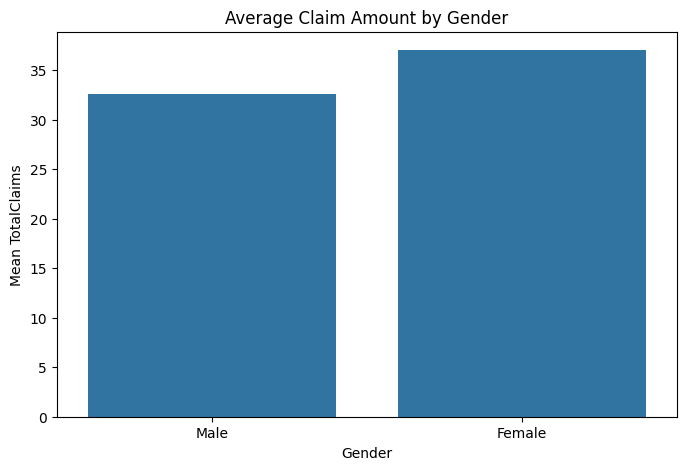

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Gender', 
    y='TotalClaims', 
    data=df[df['Gender'].str.lower().isin(['male','female'])],
    estimator=lambda x: np.mean(x),
    ci=None
)
plt.title('Average Claim Amount by Gender')
plt.ylabel('Mean TotalClaims')
plt.show()